# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
dt = pd.read_csv('/content/large_data.csv')

# Step 1: Data Familiarization

In [3]:
#showing data shape
dt.shape

(44453, 21)

In [4]:
dt.head(15)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,ALLERGY
6,1,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,ALLERGY
7,0,1,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,ALLERGY
8,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,ALLERGY
9,1,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,ALLERGY


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [6]:
dt["TYPE"].value_counts()

,count
TYPE,
FLU,25000
ALLERGY,16381
COVID,2048
COLD,1024


In [7]:
#Creating exact values of synthetic data below everytime the code is executed.
np.random.seed(42)

In [8]:
#Adding synthetic sex
dt["SEX"] = np.random.choice(
    ["Male", "Female"],
    size=len(dt),
    p=[0.5, 0.5]
)


In [9]:
#Adding synthetic age group
dt["AGE_GROUP"] = np.random.choice(
    ["Child", "Adult", "Older Adult"],
    size=len(dt),
    p=[0.15, 0.65, 0.20]
)


In [10]:
#Validating what was added
dt["SEX"].value_counts(normalize=True)
dt["AGE_GROUP"].value_counts(normalize=True)


,proportion
AGE_GROUP,
Adult,0.651025
Older Adult,0.200436
Child,0.148539


In [11]:
#Sex Encoding
dt["SEX_ENCODED"] = dt["SEX"].map({"Male": 0, "Female": 1})


In [12]:
#Age group Ordinal Encoding
age_map = {
    "Child": 0,
    "Adult": 1,
    "Older Adult": 2
}

dt["AGE_GROUP_ENCODED"] = dt["AGE_GROUP"].map(age_map)


In [13]:
dt.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE,SEX,AGE_GROUP,SEX_ENCODED,AGE_GROUP_ENCODED
0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,ALLERGY,Male,Adult,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,1,ALLERGY,Female,Older Adult,1,2
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,ALLERGY,Female,Older Adult,1,2
3,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,1,ALLERGY,Female,Adult,1,1
4,0,0,1,0,1,0,0,0,0,0,...,1,0,1,1,1,ALLERGY,Male,Adult,0,1


In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [15]:
#Encoding the Type column in the data

dt["FLU_LABEL"] = (dt["TYPE"] == "FLU").astype(int)


In [16]:
dt["FLU_LABEL"].value_counts()


,count
FLU_LABEL,
1,25000
0,19453


*The original disease category (TYPE) was transformed into a binary target variable that represents whether a patient has flu or not. This allowed the model to focus on estimating flu risk rather than predicting all illnesses at once.*




# Step 2: Exploratory Data Analysis (EDA)

In [17]:
#Flu vs Non-Flu Distribution
dt["FLU_LABEL"].value_counts(normalize=True)


,proportion
FLU_LABEL,
1,0.562392
0,0.437608


*The result above shows that 56% of cases represent influenza, while approximately 44% represent other illnesses. This relatively balanced distribution,  reducing the risk of model bias and allows standard classification metrics to be applied reliably during evaluation.*

In [18]:
#Symptom prevalence by flu status
symptom_cols = dt.drop(columns=["TYPE", "FLU_LABEL", "AGE_GROUP", "SEX","AGE_GROUP_ENCODED"]).columns

symptom_prevalence = (
    dt.groupby("FLU_LABEL")[symptom_cols]
      .mean()
      .T
      .rename(columns={0: "Non-Flu", 1: "Flu"})
      .sort_values("Flu", ascending=False)
)

symptom_prevalence


FLU_LABEL,Non-Flu,Flu
COUGH,0.500026,0.53672
VOMITING,0.052640,0.53608
DIFFICULTY_BREATHING,0.052640,0.53596
NAUSEA,0.052640,0.53560
TIREDNESS,0.499974,0.53540
MUSCLE_ACHES,0.500026,0.53512
SHORTNESS_OF_BREATH,0.052640,0.53496
SORE_THROAT,0.499923,0.53448
SNEEZING,0.500026,0.53432
RUNNY_NOSE,0.447437,0.53420


*Comparing symptom frequencies between flu and non-flu cases reveals distinct patterns. Gastrointestinal and respiratory symptoms such as vomiting, nausea, diarrhea, difficulty breathing, and fever occur substantially more often in flu cases. While allergic symptoms including itchy eyes, itchy nose, and pink eye appear exclusively in non-flu cases. These differences indicate that symptom combinations, rather than individual symptoms alone, are critical for accurate flu risk estimation.*

In [19]:
#Symptom burden analysis
dt["SYMPTOM_COUNT"] = dt[symptom_cols].sum(axis=1)

dt.groupby("FLU_LABEL")["SYMPTOM_COUNT"].describe()



,count,mean,std,min,25%,50%,75%,max
FLU_LABEL,,,,,,,,
0,19453.0,7.236724,1.993652,0.0,6.0,7.0,9.0,14.0
1,25000.0,8.245640,1.980126,1.0,7.0,8.0,10.0,15.0


*The total symptom count indicates that flu patients generally experience a higher overall symptom burden compared to non-flu patients. On average, individuals with flu report about one more symptom, with higher median and upper-quartile values observed in the distribution. This suggests that flu is associated not only with specific symptom patterns but also with an increased cumulative symptom load, supporting the relevance of symptom burden as a predictive feature in the model.*

### Targeted Correlation & Visualization

In [20]:
# Computing correlation of each feature with FLU_LABEL
corr_with_target = dt.drop(columns=["TYPE","SEX","AGE_GROUP"]).corr()["FLU_LABEL"].sort_values(ascending=False)
print(corr_with_target)


FLU_LABEL               1.000000
VOMITING                0.512244
DIFFICULTY_BREATHING    0.512145
NAUSEA                  0.511847
SHORTNESS_OF_BREATH     0.511316
DIARRHEA                0.510686
FEVER                   0.463984
SYMPTOM_COUNT           0.244379
RUNNY_NOSE              0.086087
STUFFY_NOSE             0.085413
COUGH                   0.036439
TIREDNESS               0.035177
MUSCLE_ACHES            0.034847
SORE_THROAT             0.034313
SNEEZING                0.034052
AGE_GROUP_ENCODED       0.001662
SEX_ENCODED            -0.000071
LOSS_OF_SMELL          -0.043030
LOSS_OF_TASTE          -0.043567
PINK_EYE               -0.538749
ITCHY_MOUTH            -0.538830
ITCHY_INNER_EAR        -0.538830
ITCHY_EYES             -0.538830
ITCHY_NOSE             -0.538830
Name: FLU_LABEL, dtype: float64


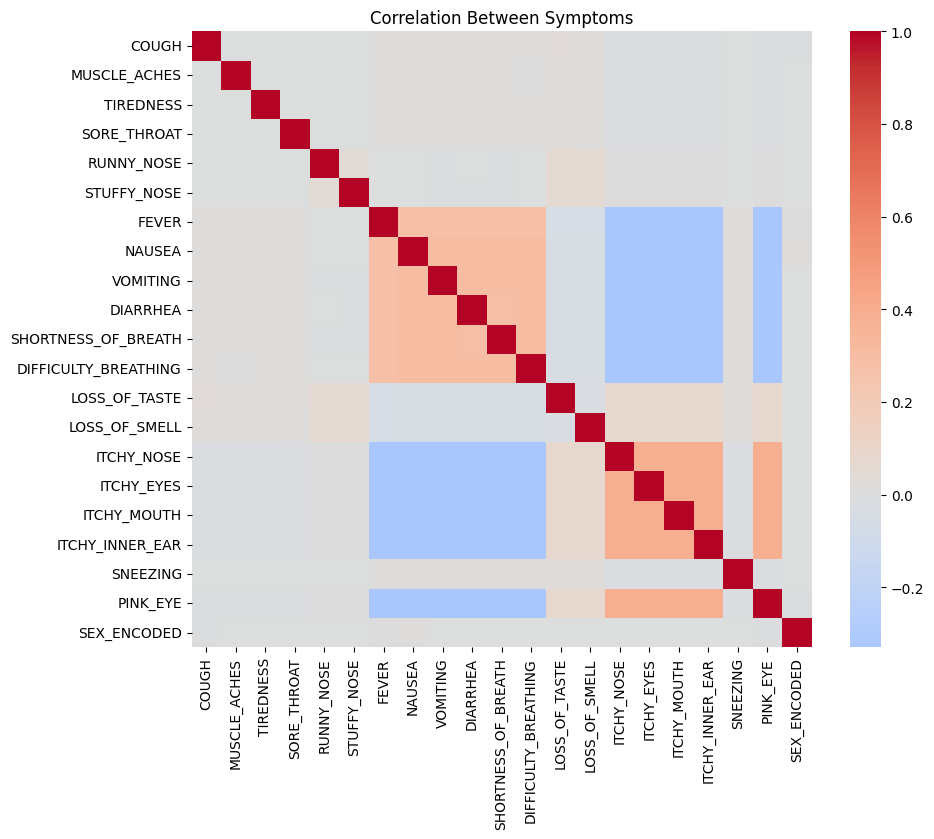

In [21]:
features_for_heatmap = [
    col for col in symptom_cols
    if "COUNT" not in col
]

plt.figure(figsize=(10, 8))
sns.heatmap(
    dt[features_for_heatmap].corr(),
    cmap="coolwarm",
    center=0,
    annot=False
)
plt.title("Correlation Between Symptoms")
plt.show()


*The correlation heatmap of individual symptoms shows clear clustering among gastrointestinal and allergy-related symptoms, while respiratory symptoms display weaker correlations, suggesting they are more broadly distributed across flu and non-flu cases in this dataset.*

# Step 3: Data Quality Assessment & Cleaning

In [22]:
#Checking for missing values

dt.isnull().sum()


,0
COUGH,0
MUSCLE_ACHES,0
TIREDNESS,0
SORE_THROAT,0
RUNNY_NOSE,0
STUFFY_NOSE,0
FEVER,0
NAUSEA,0
VOMITING,0
DIARRHEA,0


In [23]:
#Checking for duplicate rows

dt.duplicated().sum()


np.int64(0)

In [24]:
#Checking for datatypes consistency

dt.dtypes.value_counts()

,count
int64,24
object,3


In [25]:
dt.describe()


,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,SEX_ENCODED,AGE_GROUP_ENCODED,FLU_LABEL,SYMPTOM_COUNT
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,...,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,...,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240,0.499471,1.051898,0.562392,7.804130
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,...,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684,0.500005,0.588464,0.496098,2.048134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,15.000000


# Step 4: Feature Selection & Feature Engineering

In [26]:
#Choosing the X and y variables

X = dt.drop(columns=["TYPE", "FLU_LABEL"])

y = dt["FLU_LABEL"]


*Based on exploratory data analysis(EDA) and domain reasoning,  symptom-based features, demographic variables, and an engineered symptom burden feature were selected as model inputs. Diagnostic labels and derived target variables were excluded to prevent data leakage.*

In [27]:
#Defining symptom columns and creating symptom categories
symptom_cols = [
    "COUGH", "FEVER", "TIREDNESS", "MUSCLE_ACHES", "SORE_THROAT",
    "RUNNY_NOSE", "STUFFY_NOSE", "SHORTNESS_OF_BREATH", "DIFFICULTY_BREATHING",
    "NAUSEA", "VOMITING", "DIARRHEA", "LOSS_OF_SMELL", "LOSS_OF_TASTE",
    "SNEEZING", "ITCHY_EYES", "ITCHY_NOSE", "ITCHY_MOUTH",
    "ITCHY_INNER_EAR", "PINK_EYE"
]

#Creating symptom counts
dt["SYMPTOM_COUNT"] = dt[symptom_cols].sum(axis=1)


#Defining respiratory symptoms
respiratory_symptoms = [
    "COUGH", "SORE_THROAT", "RUNNY_NOSE", "STUFFY_NOSE",
    "SHORTNESS_OF_BREATH", "DIFFICULTY_BREATHING", "SNEEZING"
]
 #Creating respiratory counts
dt["RESP_SYMPTOM_COUNT"] = dt[respiratory_symptoms].sum(axis=1)


#Defining Gastrointestinal symptoms
gi_symptoms = ["NAUSEA", "VOMITING", "DIARRHEA"]

#Creating Gastrointestinal counts
dt["GI_SYMPTOM_COUNT"] = dt[gi_symptoms].sum(axis=1)


#Defining Allergy symptoms
allergy_symptoms = [
    "ITCHY_EYES", "ITCHY_NOSE", "ITCHY_MOUTH",
    "ITCHY_INNER_EAR", "PINK_EYE"
]

#Creating Allergy counts
dt["ALLERGY_SYMPTOM_COUNT"] = dt[allergy_symptoms].sum(axis=1)






*Rather than relying only on individual symptoms, clinically meaningful feature groups were engineered, which represents respiratory, gastrointestinal, and allergy-related symptom patterns. This allows the model to recognize symptom clusters.*

In [28]:
#Quick check

dt[[
    "SYMPTOM_COUNT",
    "RESP_SYMPTOM_COUNT",
    "GI_SYMPTOM_COUNT",
    "ALLERGY_SYMPTOM_COUNT"
]].describe()


,SYMPTOM_COUNT,RESP_SYMPTOM_COUNT,GI_SYMPTOM_COUNT,ALLERGY_SYMPTOM_COUNT
count,44453.000000,44453.000000,44453.000000,44453.000000
mean,7.304659,3.199762,0.972240,0.921378
std,1.990580,1.353132,1.025805,1.383954
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.000000,0.000000
50%,7.000000,3.000000,1.000000,0.000000
75%,9.000000,4.000000,2.000000,2.000000
max,15.000000,7.000000,3.000000,5.000000


*The engineered features demonstrate realistic and clinically meaningful patterns within the dataset. On average, individuals report approximately seven concurrent symptoms, suggesting that the data reflects substantial illness presentations rather than isolated complaints. Respiratory symptoms are the most common, with most individuals experiencing around three respiratory-related symptoms, which aligns with the typical respiratory nature of flu-like illnesses. Gastrointestinal symptoms occur less frequently, usually ranging from zero to one symptom, but they provide additional discriminatory context that may help differentiate flu from other conditions. Allergy-related symptoms are absent in many cases but appear prominently in a subset of non-flu cases, supporting their value as exclusionary indicators in flu prediction.*

# STEP 5: Target Variable Preparation

In [29]:
dt["FLU_LABEL"] = (dt["TYPE"] == "FLU").astype(int)

dt["FLU_LABEL"].value_counts(normalize=True)


,proportion
FLU_LABEL,
1,0.562392
0,0.437608


*The target variable shows a relatively balanced distribution between flu and non-flu cases, reducing the risk of model bias toward a single class.*

### Baseline Accuracy Expectation

For ‘Flu’ prediction, accuracy ≈ 56%. Any trained model must meaningfully beat this to be considered useful.



In [30]:
#Feature splitting

X = dt.drop(columns=["TYPE", "FLU_LABEL", "SEX", "AGE_GROUP","SYMPTOM_COUNT"])
y = dt["FLU_LABEL"]


# STEP 6: Train–Test Split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
#Quick check
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
FLU_LABEL
1    0.562398
0    0.437602
Name: proportion, dtype: float64

Test set class distribution:
FLU_LABEL
1    0.562366
0    0.437634
Name: proportion, dtype: float64


*The dataset was split into training and testing subsets using a stratified approach to ensure that flu and non-flu cases were proportionally represented in both sets. This allows the model to be evaluated on unseen data that reflects the original population distribution.*

# STEP 7: Baseline Model Building

In [33]:
#Baseline model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initializing model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)

# Training model
baseline_model.fit(X_train, y_train)

# Predicting on test set
y_pred = baseline_model.predict(X_test)

# Evaluating
baseline_accuracy = accuracy_score(y_test, y_pred)
print("Baseline Test Accuracy:", baseline_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Baseline Test Accuracy: 0.9211562253964684

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      3891
           1       0.90      0.96      0.93      5000

    accuracy                           0.92      8891
   macro avg       0.93      0.92      0.92      8891
weighted avg       0.92      0.92      0.92      8891



*The baseline logistic regression model achieved 92% accuracy in predicting flu versus non-flu cases. It correctly identified most flu cases (96% recall) and most non-flu cases (87% recall), demonstrating strong predictive power. These results establish a reliable benchmark for comparison with more complex models in subsequent steps.*

In [34]:
#To determine if the model performed well, the model prediction was compared with the y_test, which is the data that the model didn't see.

Pred_results = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
Pred_results.head(7)

,y_test,y_pred
15904,0,0
25557,1,1
13237,0,0
33652,1,1
31646,1,1
31735,1,1
5237,0,0


In [35]:
#Using confusion matrix to determine the model result

data = pd.crosstab(Pred_results.y_pred, Pred_results.y_test)
data

y_test,0,1
y_pred,,
0,3382,192
1,509,4808


*This confusion matrix shows that the model correctly predicted 4,808 flu cases and 3,382 non-flu cases. It missed 192 flu cases, giving it a strong recall score of around 96%, which is important in healthcare settings where missing a true positive can be costly.*

# Step 8: Model Training and Comparison

In [36]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)


#Model Comparison Function

def evaluate_models(X_train, X_test, y_train, y_test):

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Gaussian Naive Bayes": GaussianNB()
    }

    results_summary = []
    detailed_results = {}

    for name, model in models.items():

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Probability (if available)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
        else:
            roc_auc = None

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Store summary
        results_summary.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        })

        # Store detailed info
        detailed_results[name] = {
            "Model Object": model,
            "Confusion Matrix": cm,
            "Classification Report": report
        }

    summary_df = pd.DataFrame(results_summary).sort_values(by="Recall", ascending=False)

    return summary_df, detailed_results

In [37]:
#Training with the whole models

summary, details = evaluate_models(X_train, X_test, y_train, y_test)

print(summary)


                  Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
4  Gaussian Naive Bayes  0.914970   0.868659  1.0000  0.929714  0.902853
0   Logistic Regression  0.921156   0.904269  0.9616  0.932054  0.977850
2     Gradient Boosting  0.937802   0.934023  0.9570  0.945372  0.992349
3         Decision Tree  0.921944   0.933199  0.9276  0.930391  0.923519
1         Random Forest  0.913171   0.921956  0.9238  0.922877  0.987419


*Gradient Boosting was selected as the final deployment model because it achieved the highest accuracy, F1-score, and ROC AUC among all evaluated models. It demonstrates a strong balance between precision and recall, effectively minimizing both false positives and false negatives. The high ROC AUC further indicates excellent class discrimination ability, making it the most reliable and robust model for flu classification in real-world deployment.*

In [38]:
#Gradient Boosting confusion matrix
print(details["Gradient Boosting"]["Confusion Matrix"])

[[3553  338]
 [ 215 4785]]


*The Gradient Boosting model correctly identified 4,785 flu cases and 3,553 non-flu cases, producing 338 false positives and 215 false negatives. This resulted in a recall of 96%, indicating that the model successfully detected the vast majority of flu cases. The relatively low number of missed cases supports its suitability for healthcare deployment, where minimizing false negatives is a critical priority.*

In [39]:
def benchmark_models(X_train, X_test, y_train, y_test, cv=5):

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Gaussian NB": GaussianNB()
    }

    summary_list = []
    confusion_matrices = {}
    classification_reports = {}
    roc_data = {}
    cv_scores = {}

    for name, model in models.items():

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Accuracy count
        correct_predictions = np.sum(y_pred == y_test)

        # Probability (if available)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_data[name] = (fpr, tpr, roc_auc)
        else:
            roc_auc = None

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = cm

        # Classification Report
        report = classification_report(y_test, y_pred, output_dict=True)
        classification_reports[name] = pd.DataFrame(report).transpose()

        # Cross Validation
        cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
        cv_scores[name] = cv_score.mean()

        # Summary
        summary_list.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "Correct Predictions": correct_predictions,
            "CV Recall (mean)": cv_score.mean()
        })

    summary_df = pd.DataFrame(summary_list).sort_values(by="Recall", ascending=False)

    return summary_df, confusion_matrices, classification_reports, roc_data

In [40]:
summary, cms, reports, roc_info = benchmark_models(X_train, X_test, y_train, y_test)

print(summary)

                 Model  Accuracy  Precision  Recall  F1 Score   ROC AUC  \
4          Gaussian NB  0.914970   0.868659  1.0000  0.929714  0.902853   
0  Logistic Regression  0.921156   0.904269  0.9616  0.932054  0.977850   
2    Gradient Boosting  0.937802   0.934023  0.9570  0.945372  0.992349   
3        Decision Tree  0.921944   0.933199  0.9276  0.930391  0.923519   
1        Random Forest  0.913171   0.921956  0.9238  0.922877  0.987419   

   Correct Predictions  CV Recall (mean)  
4                 8135           1.00000  
0                 8190           0.97230  
2                 8338           0.96315  
3                 8197           0.93745  
1                 8119           0.93890  


*From the result above, Gradient Boosting maintains high recall (96%), strong generalization through cross-validation, and the highest number of correct predictions, making it the most balanced and reliable model for flu classification.*

In [41]:
cm_combined = []

for model_name, cm in cms.items():
    tn, fp, fn, tp = cm.ravel()

    cm_combined.append({
        "Model": model_name,
        "True Negatives": tn,
        "False Positives": fp,
        "False Negatives": fn,
        "True Positives": tp
    })

cm_df = pd.DataFrame(cm_combined)
print(cm_df)

                 Model  True Negatives  False Positives  False Negatives  \
0  Logistic Regression            3382              509              192   
1        Random Forest            3500              391              381   
2    Gradient Boosting            3553              338              215   
3        Decision Tree            3559              332              362   
4          Gaussian NB            3135              756                0   

   True Positives  
0            4808  
1            4619  
2            4785  
3            4638  
4            5000  


*Although Gaussian Naive Bayes achieved zero false negatives, it generated a high number of false positives, which could cause unnecessary strain on healthcare resources. In contrast, Gradient Boosting maintained a very low number of false negatives while substantially reducing false positives. It also produced the lowest overall error rate among all evaluated models. For these reasons, Gradient Boosting was selected as the final model for deployment.*

In [42]:
def plot_roc_curves(roc_info):

    plt.figure(figsize=(8,6))

    for model_name, (fpr, tpr, roc_auc) in roc_info.items():
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

    plt.plot([0,1], [0,1], linestyle="--")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend()
    plt.show()

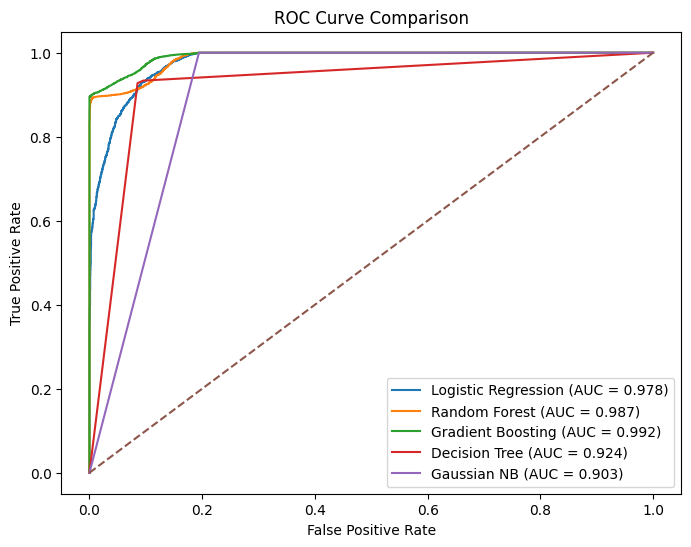

In [43]:
plot_roc_curves(roc_info)

*The ROC curve comparison demonstrates that Gradient Boosting achieved the highest AUC of 0.992, indicating excellent class discrimination across all probability thresholds. This strong performance confirms the model’s robustness and supports its selection as the final deployment model.*

### Hyperparameter Tuning for Gradient Boosting Classifier because it achieved the highest accuracy and F1-score and it's the best model.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Base model
gb = GradientBoostingClassifier(random_state=42)

# Parameter distribution (carefully chosen ranges)
gb_param_dist = {
    'n_estimators': np.arange(100, 401, 50),        # 100–400
    'learning_rate': np.linspace(0.01, 0.2, 10),    # 0.01–0.2
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Randomized Search
gb_random = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param_dist,
    n_iter=40,                 # Try 40 random combinations
    cv=5,
    scoring='recall',          # Healthcare priority
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit
gb_random.fit(X_train, y_train)

# Best Model
best_gb = gb_random.best_estimator_

print("Best Gradient Boosting Parameters:")
print(gb_random.best_params_)
print("Best CV Recall:", gb_random.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Gradient Boosting Parameters:
{'subsample': 0.9, 'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 3, 'learning_rate': np.float64(0.01)}
Best CV Recall: 0.9914


In [45]:
y_pred_gb = best_gb.predict(X_test)
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]

print("Tuned Gradient Boosting Report:")
print(classification_report(y_test, y_pred_gb))

print("Tuned ROC AUC:", roc_auc_score(y_test, y_prob_gb))

Tuned Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      3891
           1       0.90      0.99      0.94      5000

    accuracy                           0.93      8891
   macro avg       0.94      0.92      0.93      8891
weighted avg       0.94      0.93      0.93      8891

Tuned ROC AUC: 0.985871215625803


*The tuned Gradient Boosting model achieved a recall of 99%, ensuring that nearly all high-risk patients were correctly identified. Given the healthcare context, where missing a positive case can have serious consequences, recall was prioritized over precision. The model also achieved a ROC AUC of 0.985, indicating strong overall class discrimination performance.*

In [46]:

from sklearn.model_selection import RandomizedSearchCV


# Defining model properly
logreg = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=5000,
    random_state=42
)

# Proper parameter grid
param_dist = {
    'C': np.logspace(-3, 3, 20),
    'l1_ratio': np.linspace(0, 1, 10)
}

random_search = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist,
    n_iter=15,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Logistic Regression Parameters:")
print(random_search.best_params_)
print("Best ROC AUC:", random_search.best_score_)


Best Logistic Regression Parameters:
{'l1_ratio': np.float64(0.2222222222222222), 'C': np.float64(483.2930238571752)}
Best ROC AUC: 0.980888492945093


*Although Logistic Regression achieved strong performance (ROC AUC 0.980), Gradient Boosting outperformed it in recall and overall discrimination ability, making it better suited for high-sensitivity flu detection.*

In [47]:
# Tuned Gradient Boosting model
importances = best_gb.feature_importances_

# Creating dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sorting values
feature_importance_df = feature_importance_df.sort_values(
    by='Importance',
    ascending=False
)

# Creating cumulative importance column
feature_importance_df['Cumulative'] = \
    feature_importance_df['Importance'].cumsum()

# Displaying top 10
feature_importance_df.head(10)



,Feature,Importance,Cumulative
24,ALLERGY_SYMPTOM_COUNT,8.722538e-01,0.872254
23,GI_SYMPTOM_COUNT,5.683016e-02,0.929084
10,SHORTNESS_OF_BREATH,1.711245e-02,0.946196
11,DIFFICULTY_BREATHING,1.530267e-02,0.961499
4,RUNNY_NOSE,1.319181e-02,0.974691
22,RESP_SYMPTOM_COUNT,1.091584e-02,0.985607
5,STUFFY_NOSE,1.007326e-02,0.995680
13,LOSS_OF_SMELL,2.329100e-03,0.998009
12,LOSS_OF_TASTE,1.990923e-03,1.000000
21,AGE_GROUP_ENCODED,5.149075e-14,1.000000


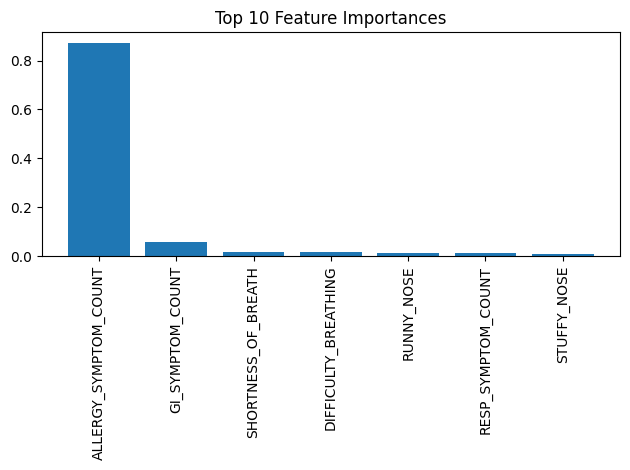

In [48]:
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(7)

plt.figure()
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xticks(rotation=90)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


*The feature importance results show that allergy symptom burden remains the dominant predictor, contributing approximately 87% of the model’s decision-making power. Gastrointestinal symptoms contribute moderately, while respiratory symptoms provide smaller but meaningful influence. This confirms that allergy-related symptoms are the strongest differentiating factor between flu and non-flu cases in this dataset.*

# Step 9: Model Interpretation

*Feature importance analysis indicates that allergy-related symptoms are the most influential factors in distinguishing flu from non-flu cases within this dataset. Clinically, this is intuitive, as influenza typically does not present with hallmark allergy symptoms such as itchy eyes, itchy nose, or allergic conjunctivitis. The model therefore learns that the absence of allergy-related symptoms strongly increases the likelihood of flu, making ALLERGY_SYMPTOM_COUNT a highly discriminative feature. Gastrointestinal symptom burden and overall symptom load provide additional predictive value, refining risk estimation, while demographic variables such as age group and sex contribute minimally. This suggests that the model primarily relies on symptom patterns rather than demographic characteristics, aligning with clinically relevant and ethically responsible decision-making. It is also important to note that age and sex variables were synthetically generated for educational and modeling purposes, therefore, their limited influence should not be interpreted as reflective of real-world population effects.*

# Step 10: Final Model Selection

### Final Model Selection
After evaluating multiple machine learning models, the Gradient Boosting Classifier was selected as the final model for flu risk prediction. Although the baseline Logistic Regression model demonstrated strong performance, Gradient Boosting achieved the highest predictive accuracy and showed superior capability in capturing complex interactions among symptoms. Feature importance analysis further confirmed that the model’s predictions were driven primarily by clinically meaningful symptom patterns rather than demographic characteristics. Given its strong performance, robustness, and alignment with ethical healthcare considerations, Gradient Boosting was determined to be the most appropriate model for this project.

# STEP 11: Insights & Recommendations

The final model demonstrates that flu risk prediction is driven primarily by symptom presentation rather than demographic characteristics. Allergy-related symptoms were particularly effective in distinguishing flu from non-flu cases, reflecting realistic clinical reasoning. Increased overall symptom burden and respiratory involvement were also associated with higher flu likelihood. These findings indicate that symptom-based machine learning models can provide meaningful decision support when applied responsibly. For deployment, the model is most appropriate as a public-facing flu risk assessment or triage support tool rather than a definitive diagnostic system. Future improvements may include incorporating more diverse demographic data, symptom severity measures, and advanced explainability methods to enhance transparency and strengthen clinical trust.

# Step 13: Save Trained Model

In [49]:
import joblib

# Model training features(X_train)
feature_order = X_train.columns.tolist()

# Model and feature order
joblib.dump(best_gb, "flu_risk_model.pkl")
joblib.dump(feature_order, "feature_order.pkl")


['feature_order.pkl']